In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

In [2]:
data = pd.read_csv('./Загрузки/MaxQuant/Silac_con.csv')

In [3]:
data.head()

,Lead gene name,Lead ID,Lead protein name,Majority protein IDs,Organellar markers,Profiled in how many Control Maps,Log2 Ratio H/L Con1_03K,Log2 Ratio H/L Con1_06K,Log2 Ratio H/L Con1_12K,Log2 Ratio H/L Con1_24K,...,Log2 Ratio H/L Con2_03K,Log2 Ratio H/L Con2_06K,Log2 Ratio H/L Con2_12K,Log2 Ratio H/L Con2_24K,Log2 Ratio H/L Con2_80K,Log2 Ratio H/L Con3_03K,Log2 Ratio H/L Con3_06K,Log2 Ratio H/L Con3_12K,Log2 Ratio H/L Con3_24K,Log2 Ratio H/L Con3_80K
0,AAAS,Q9NRG9,Aladin,Q9NRG9;Q9NRG9-2,NaN,3,0.131853,-0.484025,-0.533848,0.358396,...,0.082975,-0.532804,-0.463748,0.671112,1.332336,-0.024487,-0.602613,-0.652629,0.416083,1.542060
1,AAK1,Q2M2I8,AP2-associated protein kinase 1,Q2M2I8;Q2M2I8-2,NaN,3,0.137241,0.294077,-0.013058,-0.545108,...,0.213752,0.457121,-0.169777,-0.074441,-0.551839,-0.444812,0.073546,0.180148,-0.631444,-0.815377
2,AARS,P49588,Alanine--tRNA ligase. cytoplasmic,P49588;P49588-2,NaN,3,-0.828460,-0.658561,-1.160266,-1.315846,...,-0.667011,-0.789711,-1.059826,-1.248176,-0.787418,-0.709104,-0.450045,-0.866778,-1.504018,-0.734659
3,AARS2,Q5JTZ9,Alanine--tRNA ligase. mitochondrial,Q5JTZ9,Mitochondrion,3,-1.128693,-0.660361,3.141940,3.035413,...,-1.051967,-0.708090,3.187578,4.710118,2.979897,-0.868173,-0.400358,1.698663,0.918844,4.110196
4,ABCB1,P08183,Multidrug resistance protein 1,P08183;P08183-2,Plasma membrane,3,-0.784085,-0.487905,-0.222683,0.726831,...,-0.414614,-0.475575,0.045303,1.333996,2.798673,-0.445735,-0.349640,-0.121361,0.851519,2.806551


# Control replica 1

In [4]:
data_control = data.iloc[:,[0,4,6,7,8,9,10]]

In [5]:
#delete NA's for svm data
data_control_svm = data_control.dropna()

In [6]:
#coding organellar names to numbers
place = ['Mitochondrion', 'Plasma membrane','Peroxisome','Actin binding proteins', 'Lysosome', 'Large Protein Complex',\
        'ER', 'Endosome', 'Golgi', 'ER_Tubular', 'Ergic/cisGolgi', 'Nuclear pore complex']
j = 1
for i in place:
    data_control_svm  = data_control_svm.replace(i, int(j))
    j += 1
    
data_control_svm['Organellar markers'] = data_control_svm['Organellar markers'].apply(np.int64)

# Support Vector Classification

In [7]:
#16-fold cross-validation
X = data_control_svm.iloc[:, 2:7]
y = data_control_svm['Organellar markers']
clf = OneVsRestClassifier(SVC())
y_pred = cross_val_predict(clf, X, y, cv = 16)
final_model = clf.fit(X, y)
print("Accuracy:",final_model.score(X,y))

/home/marina/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=16.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy: 0.8609566184649611


In [8]:
#predict localization for EGFR, GRB2, SHC1, PKN2 proteins
EGFR = data_control.loc[data_control['Lead gene name'] == 'EGFR']
GRB2 = data_control.loc[data_control['Lead gene name'] == 'GRB2']
SHC1 = data_control.loc[data_control['Lead gene name'] == 'SHC1']
PKN2 = data_control.loc[data_control['Lead gene name'] == 'PKN2']
proteins_of_interest = pd.concat([EGFR, GRB2, SHC1, PKN2])

In [9]:
proteins_of_interest['Organellar markers'] = final_model.predict(proteins_of_interest.iloc[:, 2:7])

In [10]:
proteins_of_interest

,Lead gene name,Organellar markers,Log2 Ratio H/L Con1_03K,Log2 Ratio H/L Con1_06K,Log2 Ratio H/L Con1_12K,Log2 Ratio H/L Con1_24K,Log2 Ratio H/L Con1_80K
824,EGFR,2,-0.308591,-0.308323,-0.405643,0.376513,2.352900
1154,GRB2,6,-0.694298,-0.408857,-0.699583,-0.290268,0.401521
2656,SHC1,6,-1.031002,-0.458208,0.551196,1.114367,0.259544
2067,PKN2,6,0.509949,0.507820,-0.010091,-0.231075,-0.579836


In [11]:
data_control.loc[824, 'Organellar markers'] = 2 # Plasma membrane
data_control.loc[1154, 'Organellar markers'] = 6 # Large Protein Complex
data_control.loc[2656, 'Organellar markers'] = 6 # Large Protein Complex
data_control.loc[2067, 'Organellar markers'] = 6 # Large Protein Complex

/home/marina/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [12]:
#replace NA to more comfortable in future
data_control = data_control.dropna(thresh = 3)
data_control = data_control.fillna('Not a marker protein')

# PCA

In [13]:
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(data_control.iloc[:,2:7])

In [14]:
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2', 'principal component 3'])
features = data_control.iloc[:,0:2]

In [15]:
#coming back to original names
place = ['Mitochondrion', 'Plasma membrane','Peroxisome','Actin binding proteins', 'Lysosome', 'Large Protein Complex',\
        'ER', 'Endosome', 'Golgi', 'ER_Tubular', 'Ergic/cisGolgi', 'Nuclear pore complex']
j = 1
for i in place:
    features = features.replace(j, i)
    j += 1

In [16]:
finalDf = pd.concat([principalDf.reset_index(drop=True), features.reset_index(drop=True)], axis = 1)

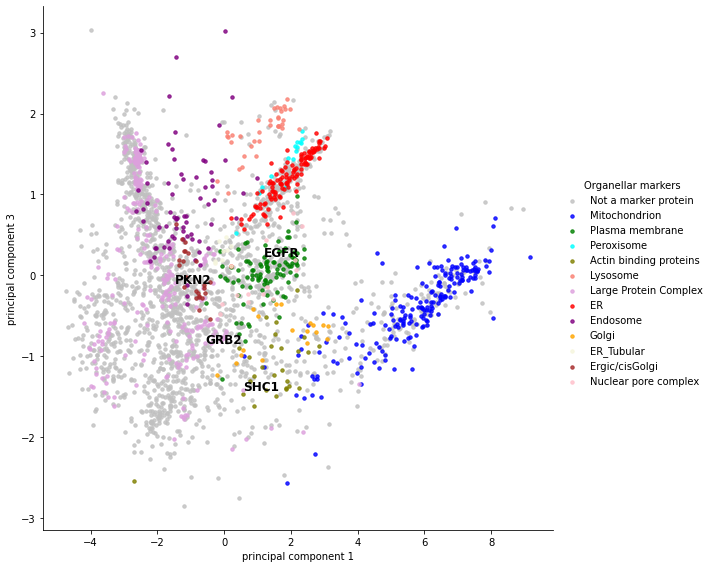

In [17]:
sns.lmplot(x = "principal component 1", y = "principal component 3",
  data = finalDf, 
  fit_reg = False, 
  palette = ['silver', 'blue', 'green', 'aqua', 'olive', 'salmon', 'plum', 'red', 'purple', 'orange','beige', 'brown', 'pink'],
  hue = 'Organellar markers', # color by cluster
  legend = True,
  scatter_kws={"s": 12},
          height=8) # specify the point size
labels = ['EGFR', 'GRB2', 'SHC1', 'PKN2']
for i in labels:
    x = finalDf.loc[finalDf['Lead gene name'] == i]["principal component 1"].values[0]
    y = finalDf.loc[finalDf['Lead gene name'] == i]["principal component 3"].values[0]
    plt.text(x,y, i,
           weight  = 'bold', fontsize = 12)
plt.show()

# EGF stimulation

In [18]:
data = pd.read_csv('./Загрузки/MaxQuant/Silac_egf.csv')

In [19]:
data_egf = data.iloc[:,[0,4,6,7,8,9,10]]

In [20]:
#delete NA's for svm data
data_egf_svm = data_egf.dropna()

In [21]:
#coding organellar names to numbers
place = ['Mitochondrion', 'Plasma membrane','Peroxisome','Actin binding proteins', 'Lysosome', 'Large Protein Complex',\
        'ER', 'Endosome', 'Golgi', 'ER_Tubular', 'Ergic/cisGolgi', 'Nuclear pore complex']
j = 1
for i in place:
    data_egf_svm  = data_egf_svm.replace(i, int(j))
    j += 1
    
data_egf_svm['Organellar markers'] = data_egf_svm['Organellar markers'].apply(np.int64)

# Support Vector Classification

In [22]:
#16-fold cross-validation
X = data_egf_svm.iloc[:, 2:7]
y = data_egf_svm['Organellar markers']
clf = OneVsRestClassifier(SVC())
y_pred = cross_val_predict(clf, X, y, cv = 16)
final_model = clf.fit (X, y)
print("Accuracy:",final_model.score(X,y))

/home/marina/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=16.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy: 0.8348214285714286


In [23]:
#predict localization for EGFR, GRB2, SHC1, PKN2 proteins
EGFR = data_egf.loc[data_egf['Lead gene name'] == 'EGFR']
GRB2 = data_egf.loc[data_egf['Lead gene name'] == 'GRB2']
SHC1 = data_egf.loc[data_egf['Lead gene name'] == 'SHC1']
PKN2 = data_egf.loc[data_egf['Lead gene name'] == 'PKN2']
proteins_of_interest = pd.concat([EGFR, GRB2, SHC1, PKN2])

In [24]:
proteins_of_interest['Organellar markers'] = final_model.predict(proteins_of_interest.iloc[:, 2:7])

In [25]:
proteins_of_interest

,Lead gene name,Organellar markers,Log2 Ratio H/L EGF1_03K,Log2 Ratio H/L EGF1_06K,Log2 Ratio H/L EGF1_12K,Log2 Ratio H/L EGF1_24K,Log2 Ratio H/L EGF1_80K
811,EGFR,8,1.086512,-0.511115,-1.208894,0.426748,1.772646
1138,GRB2,5,1.072860,-0.800425,-1.455495,1.061707,2.705624
2630,SHC1,7,0.779470,-0.713024,-1.348794,0.926151,2.633547
2057,PKN2,6,0.242572,0.041664,-0.573746,-0.145813,-0.035343


In [26]:
data_egf.loc[811, 'Organellar markers'] = 8 # Endosome
data_egf.loc[1138, 'Organellar markers'] = 5 # Lysosome
data_egf.loc[2630, 'Organellar markers'] = 7 # ER
data_egf.loc[2057, 'Organellar markers'] = 6 # Large Protein Complex

/home/marina/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [27]:
#replace NA to more comfortable in future
data_egf = data_egf.dropna(thresh = 3)
data_egf = data_egf.fillna('Not a marker protein')

# PCA

In [28]:
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(data_egf.iloc[:,2:7])

In [29]:
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2', 'principal component 3'])
features = data_egf.iloc[:,0:2]

In [30]:
#coming back to original names
place = ['Mitochondrion', 'Plasma membrane','Peroxisome','Actin binding proteins', 'Lysosome', 'Large Protein Complex',\
        'ER', 'Endosome', 'Golgi', 'ER_Tubular', 'Ergic/cisGolgi', 'Nuclear pore complex']
j = 1
for i in place:
    features = features.replace(j, i)
    j += 1

In [31]:
finalDf = pd.concat([principalDf.reset_index(drop=True), features.reset_index(drop=True)], axis = 1)

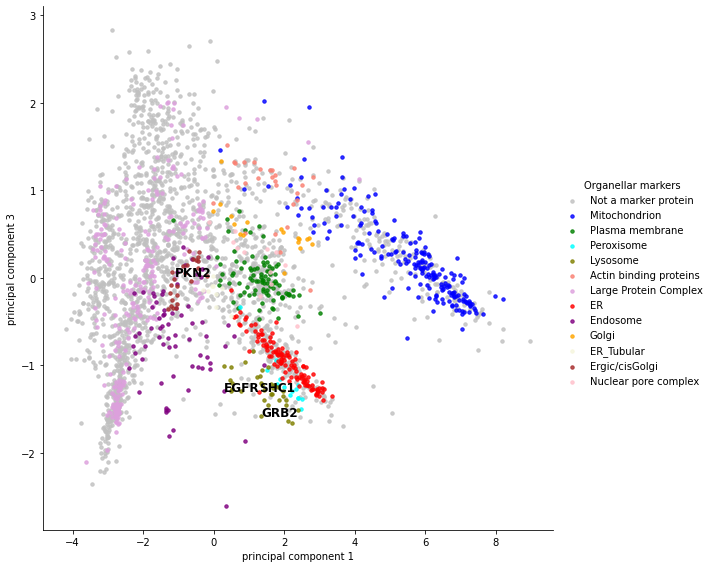

In [32]:
sns.lmplot(x = "principal component 1", y = "principal component 3",
  data = finalDf, 
  fit_reg = False, 
  palette = ['silver', 'blue', 'green', 'aqua', 'olive', 'salmon', 'plum', 'red', 'purple', 'orange','beige', 'brown', 'pink'],
  hue = 'Organellar markers', # color by cluster
  legend = True,
  scatter_kws={"s": 12},
          height=8) # specify the point size
labels = ['EGFR', 'GRB2', 'SHC1', 'PKN2']
for i in labels:
    x = finalDf.loc[finalDf['Lead gene name'] == i]["principal component 1"].values[0]
    y = finalDf.loc[finalDf['Lead gene name'] == i]["principal component 3"].values[0]
    plt.text(x,y, i,
           weight  = 'bold', fontsize = 12)
plt.show()

# Volcano plot for membrane fraction

In [2]:
data = pd.read_csv('./Загрузки/MaxQuant/LFQ_org.csv')
df = data.iloc[:, [0,4,5,6,7,8,9]]

In [3]:
df.head()

,Lead gene name,LFQ intensity Con1_Organellar,LFQ intensity Con2_Organellar,LFQ intensity Con3_Organellar,LFQ intensity EGF1_Organellar,LFQ intensity EGF2_Organellar,LFQ intensity EGF3_Organellar
0,A2ML1,22121000,37301000,0,0,0,0
1,AAAS,1166000000,1408200000,1236600000,1274800000,1298600000,1046900000
2,AAED1,15912000,16412000,0,14982000,15018000,13052000
3,AAK1,167650000,167770000,149380000,177430000,161070000,200280000
4,AAR2,29162000,25017000,32798000,34202000,23535000,21060000


In [4]:
df['LFQ intensity Con1_Organellar'] = np.log2(df['LFQ intensity Con1_Organellar'])
df['LFQ intensity Con2_Organellar'] = np.log2(df['LFQ intensity Con2_Organellar'])
df['LFQ intensity Con3_Organellar'] = np.log2(df['LFQ intensity Con3_Organellar'])
df['LFQ intensity EGF1_Organellar'] = np.log2(df['LFQ intensity EGF1_Organellar'])
df['LFQ intensity EGF2_Organellar'] = np.log2(df['LFQ intensity EGF2_Organellar'])
df['LFQ intensity EGF3_Organellar'] = np.log2(df['LFQ intensity EGF3_Organellar'])
df.head()

/home/marina/miniconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/marina/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/marina/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/marina/miniconda3/lib/python

,Lead gene name,LFQ intensity Con1_Organellar,LFQ intensity Con2_Organellar,LFQ intensity Con3_Organellar,LFQ intensity EGF1_Organellar,LFQ intensity EGF2_Organellar,LFQ intensity EGF3_Organellar
0,A2ML1,24.398913,25.152711,-inf,-inf,-inf,-inf
1,AAAS,30.118921,30.391205,30.203732,30.247624,30.274310,29.963476
2,AAED1,23.923612,23.968248,-inf,23.836727,23.840189,23.637768
3,AAK1,27.320877,27.321910,27.154412,27.402675,27.263113,27.577443
4,AAR2,24.797586,24.576405,24.967105,25.027577,24.488305,24.328002


In [5]:
result = pd.DataFrame(columns=['proteins', '-log10 pvalue', 'mean difference (Con-EGF)'])
for i in range(0, df.shape[0]):
    row = df.iloc[[i]]
    g0 = row[["LFQ intensity Con1_Organellar", "LFQ intensity Con2_Organellar", "LFQ intensity Con3_Organellar"]].values.tolist()[0]
    g1 = row[["LFQ intensity EGF1_Organellar", "LFQ intensity EGF2_Organellar", "LFQ intensity EGF3_Organellar"]].values.tolist()[0]
    pvalue = -np.log10(stats.ttest_ind(g1,g0)[1]) #TODO use the ttest_ind method from scipy
    diff = np.mean(g1)-np.mean(g0)
    result.loc[i] = [row["Lead gene name"].values[0], pvalue, diff]

/home/marina/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/marina/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:5346: RuntimeWarning: invalid value encountered in double_scalars
  d = mean1 - mean2
/home/marina/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


Text(0.5, 1.0, '500 iterations')

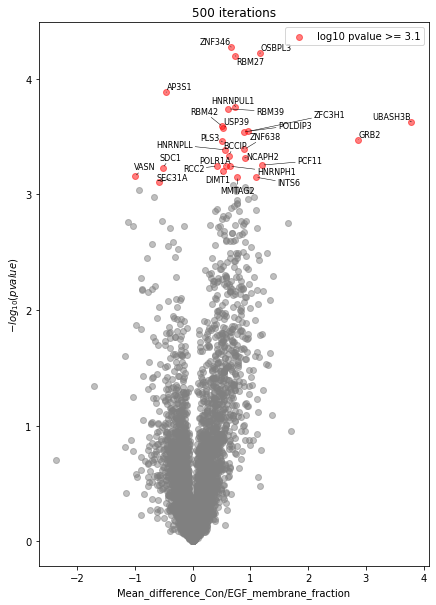

In [6]:
from adjustText import adjust_text
plt.figure(figsize=(7, 10))
non_sig = result[result["-log10 pvalue"] < 3.1]
sig = result[result["-log10 pvalue"] >= 3.1]
plt.scatter(non_sig["mean difference (Con-EGF)"], non_sig["-log10 pvalue"], alpha=0.5, c = 'grey')
xs, ys = sig["mean difference (Con-EGF)"], sig["-log10 pvalue"]
plt.scatter(xs, ys, alpha=0.5, c = 'red', label = 'log10 pvalue >= 3.1')
texts = []
for x, y, l in zip(xs, ys, sig['proteins']):
    texts.append(plt.text(x, y, l, size = 8))
plt.legend()
plt.xlabel('Mean_difference_Con/EGF_membrane_fraction')
plt.ylabel('$-log_{10}(pvalue)$')
plt.title('%s iterations' % adjust_text(texts, arrowprops = dict(arrowstyle = "-", color = 'k', lw = 0.5)))